### **CSE All-Share Historical Data**


Step 1: Import Necessary Libraries

In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.metrics import mean_squared_error


Mout the drive

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Comes to working directory

In [37]:
os.chdir("/content/drive/My Drive/Colab Notebooks/Mini Project 2")
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Mini Project 2'

Step 2: Load and Prepare the Data

In [38]:
# Load the dataset
df = pd.read_csv('CSE All-Share Historical Data.csv')

# Assuming 'Price' is the column you want to predict
# Remove commas in the 'Price' column and convert to float
df['Price'] = df['Price'].str.replace(',', '').astype(float)

data = df.filter(['Price'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on (80% of the dataset)
training_data_len = math.ceil(len(dataset) * .8)



In [39]:
dataset

array([[10655.35],
       [10311.15],
       [10654.16],
       [10608.29],
       [10647.33],
       [11335.61],
       [11114.17],
       [11386.72],
       [ 9442.95],
       [ 8555.17],
       [ 8983.21],
       [ 9301.09],
       [ 9188.48],
       [ 8865.05],
       [ 8502.49],
       [ 8651.23],
       [ 8602.16],
       [ 9931.07],
       [ 9071.32],
       [ 7731.15],
       [ 7342.33],
       [ 8108.09],
       [ 7624.26],
       [ 8903.87],
       [11577.94],
       [13009.5 ],
       [12226.01],
       [11440.53],
       [10162.93],
       [ 9459.94],
       [ 8997.6 ],
       [ 8120.48],
       [ 7837.76],
       [ 7403.44],
       [ 7208.2 ],
       [ 7121.28],
       [ 7476.34],
       [ 8668.07],
       [ 6774.22],
       [ 6243.76],
       [ 5726.59],
       [ 5984.84],
       [ 5329.33],
       [ 5124.26],
       [ 5149.57],
       [ 4846.76],
       [ 4571.63],
       [ 4571.63],
       [ 5592.92],
       [ 5929.76],
       [ 6129.21],
       [ 6211.97],
       [ 599

Step 3: Scale the Data

In [40]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)



Step 4: Create the Training Dataset

In [41]:
# Create the training data set
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data to be 3-dimensional [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


Step 5: Build and Train the LSTM Model

In [43]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


172/172 [==============================] - 9s 29ms/step - loss: 0.0096


Step 6: Create the Testing Dataset

In [44]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]
# Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


Step 7: Get the Models Predicted Price Values

In [52]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #Undo scaling


2/2 [==============================] - 0s 17ms/step


Step 8: Evaluate the Model

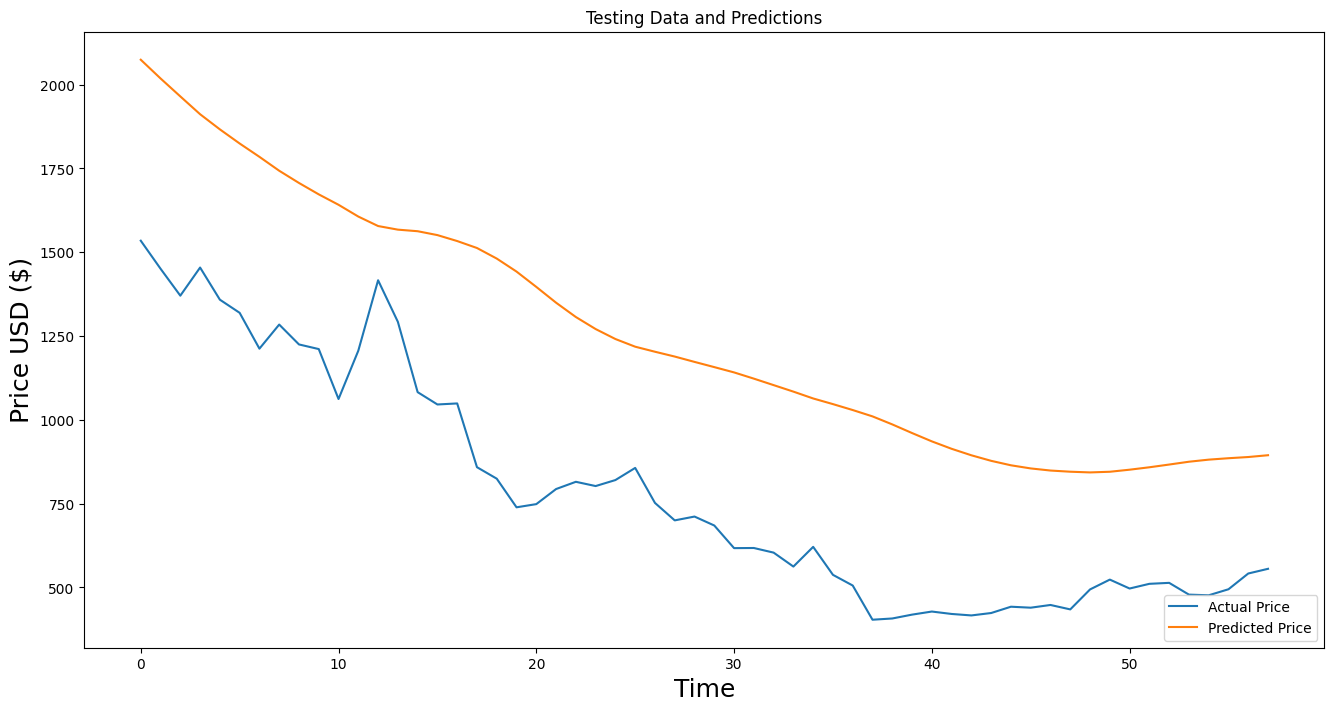

In [50]:
# Extract the actual prices for the test period
test_actual = data[training_data_len:].values

plt.figure(figsize=(16,8))
plt.title('Testing Data and Predictions')
plt.xlabel('Time', fontsize=18)  # Adjust as per your dataset
plt.ylabel('Price USD ($)', fontsize=18)
plt.plot(test_actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')  # 'predictions' obtained from earlier step
plt.legend(loc='lower right')
plt.show()


In [46]:
# Calculate the value of RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(f"RMSE: {rmse}")


RMSE: 470.8459047935749


<ipython-input-47-0ea65c245e8c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


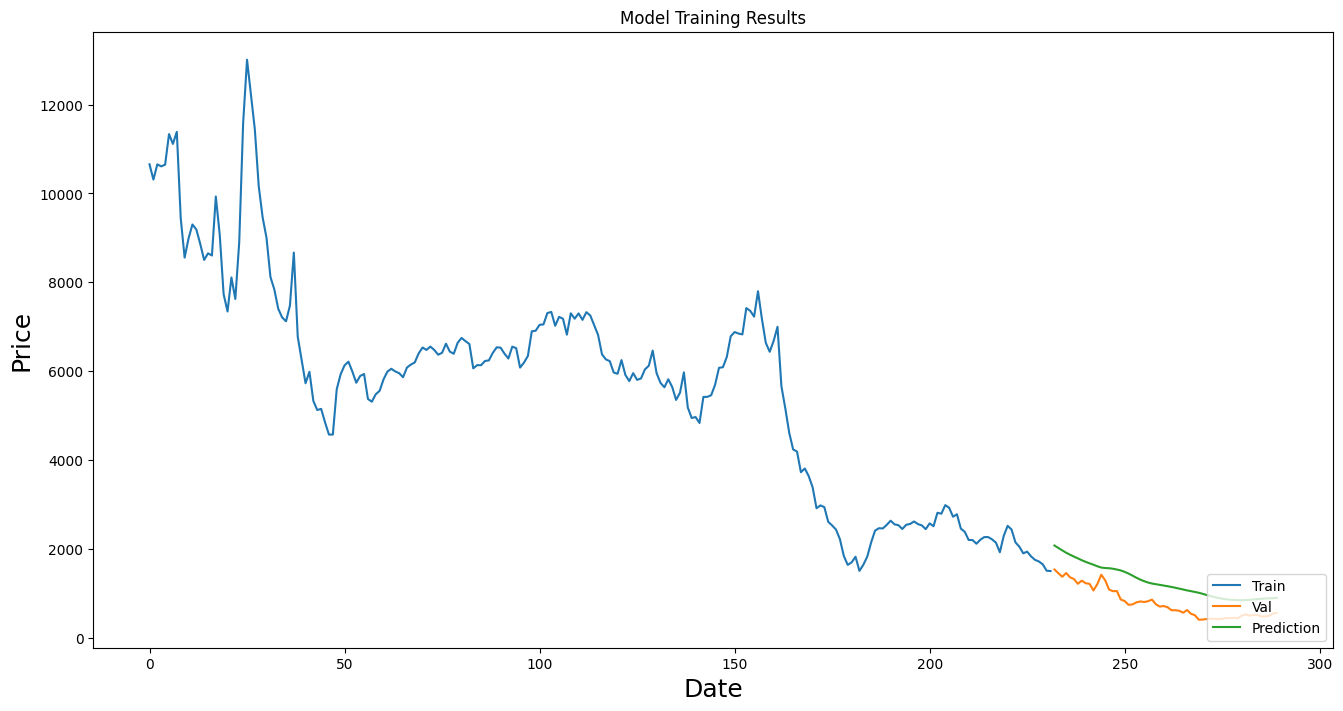

In [47]:
# Assuming you have your training predictions. If not, you can get them by:
# training_predictions = model.predict(x_train)
# training_predictions = scaler.inverse_transform(training_predictions)  # Undo scaling

# Plotting training data and predictions
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model Training Results')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Prediction'], loc='lower right')
plt.show()


<ipython-input-48-29e26cdc0126>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions  # Ensure this line matches your predictions variable


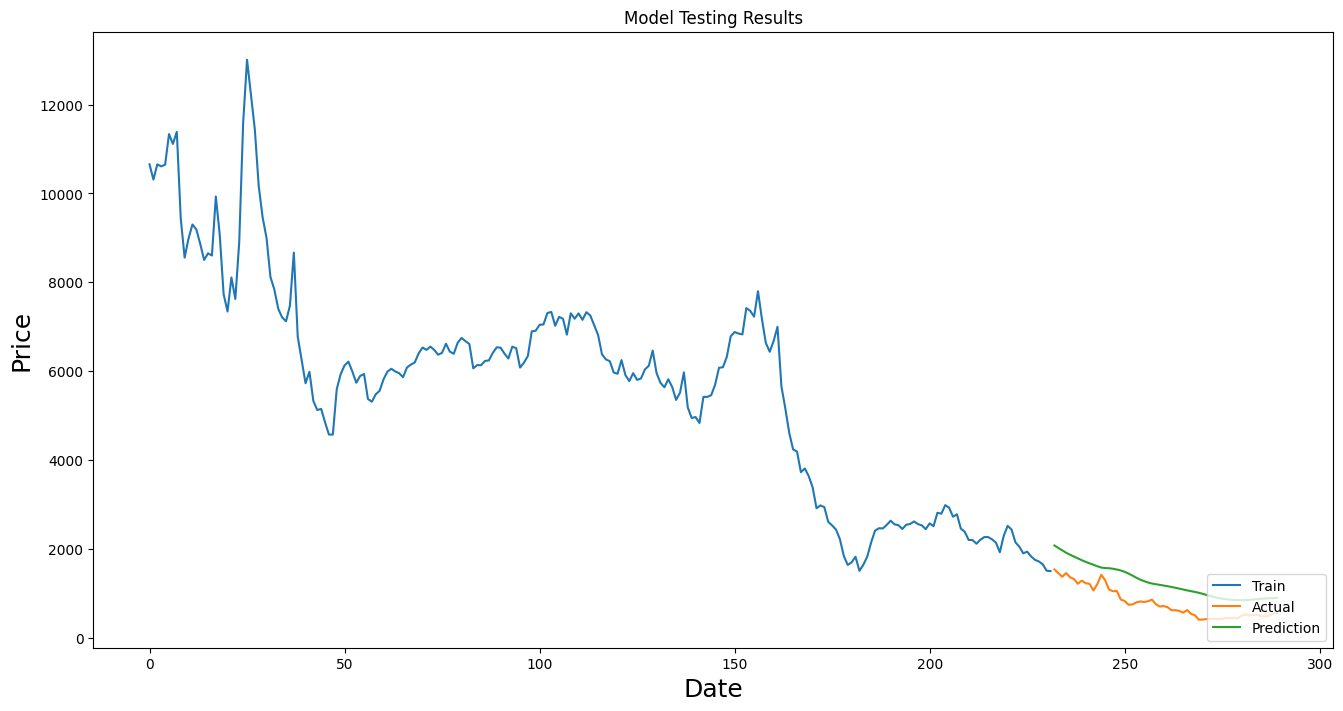

In [48]:
# Plotting testing data and predictions
valid['Predictions'] = predictions  # Ensure this line matches your predictions variable

plt.figure(figsize=(16,8))
plt.title('Model Testing Results')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Train', 'Actual', 'Prediction'], loc='lower right')
plt.show()
